# MNIST Sign Language

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

import keras
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [2]:
class SignLanguage:
    def __init__(self):
        self.model = None

        self.data = {
            "train": None,
            "test" : None
        }
        self.create_model()

    def create_model(self):
        """
        Create a CNN model and save it to self.model
        """

        model = Sequential()

        model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(64, (3, 3), activation='relu'))

        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())

        model.add(Dense(128, activation='relu'))

        model.add(Dropout(0.5))

        model.add(Dense(26, activation='softmax'))

        model.compile('adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

        self.model = model


    def prepare_data(self, images, labels):
        """
        Normalizes the dataset and splits it into train/test.
        Data is saved in self.data["train"] and self.data["test"] as a tuple
        of (images, labels)

        :param images numpy array of size (num_examples, 28*28)
        :param labels numpy array of size (num_examples, )
        """

        images = images.astype('float32') / 255.0

        images = images.reshape(-1, 28, 28, 1)

        labels = to_categorical(labels, num_classes=26)

        x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

        self.data["train"] = (x_train, y_train)
        self.data["test"] = (x_val, y_val)


    def train(self, batch_size:int=128, epochs:int=30, verbose:int=1):
        """
        Uses model.fit() to train your model and returns the history for a neat visualization.

        :param batch_size The batch size to use for training
        :param epochs     Number of epochs to use for training
        :param verbose    Whether or not to print training output
        """

        x_train, y_train = self.data["train"]
        x_val, y_val = self.data["test"]

        history = self.model.fit(
            x_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(x_val, y_val),
            verbose=verbose
        )

        return history


    def predict(self, data):
        """
        Uses the trained model to predict labels for test data.

        :param data: numpy array of test images
        :return a numpy array of test labels. array size = (num_examples, )
        """

        data = data.astype('float32') / 255.0

        data = data.reshape(-1, 28, 28, 1)

        predictions = self.model.predict(data)

        predicted_labels = np.argmax(predictions, axis=1)

        return predicted_labels


    def visualize_data(self, data):
        """
        Visualizing the hand gestures

        :param data: numpy array of images
        """
        if data is None: return

        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                axs[i][j].imshow(data[0][i*ncols+j].reshape(28, 28), cmap='gray')
        plt.show()

    def visualize_accuracy(self, history):
        """
        Plots out the accuracy measures given a keras history object

        :param history: return value from model.fit()
        """
        if history is None: return

        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title("Accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','test'])
        plt.show()

# Train and Evaluate Model

In [3]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [4]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


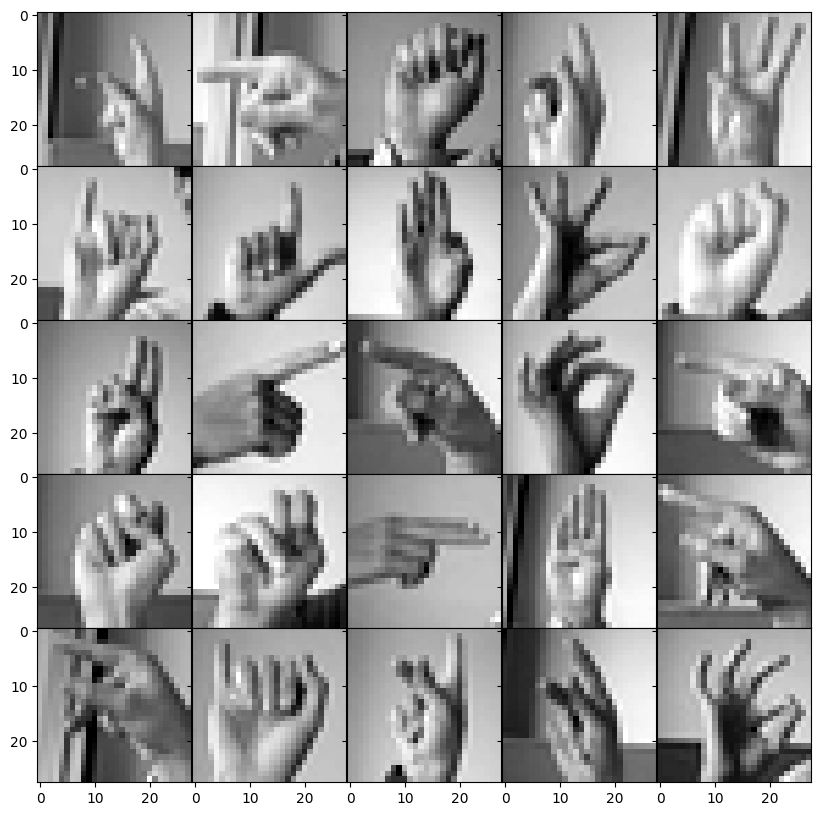

In [5]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

Epoch 1/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.1600 - loss: 2.8495 - val_accuracy: 0.7565 - val_loss: 0.9270
Epoch 2/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6619 - loss: 1.0757 - val_accuracy: 0.9201 - val_loss: 0.3497
Epoch 3/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8123 - loss: 0.5752 - val_accuracy: 0.9690 - val_loss: 0.1612
Epoch 4/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8807 - loss: 0.3701 - val_accuracy: 0.9865 - val_loss: 0.0954
Epoch 5/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9195 - loss: 0.2525 - val_accuracy: 0.9964 - val_loss: 0.0465
Epoch 6/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9348 - loss: 0.1943 - val_accuracy: 0.9954 - val_loss: 0.0324
Epoch 7/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9555 - loss: 0.1376 - val_accuracy: 0.9991 - val_loss: 0.0163
Epoch 8/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9636 - loss: 0.1171 - val_accuracy: 1

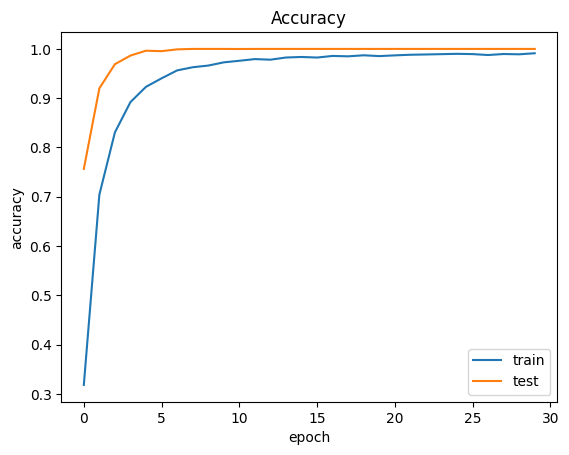

In [6]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [7]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    print(accuracy)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
0.9366982710540993
